# **Natural Languague ToolKit**

In [1]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [4]:
text = open('read.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

tokenized_words = word_tokenize(cleaned_text, "english")

print("Tokenize Words List")
print(tokenized_words)

final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

print("Stop words List")
print(final_words)


lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

print('WordNetLemmatizer List')
print(lemma_words) 


Tokenize Words List
['i', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', 'i', 'never', 'graduated', 'from', 'college', 'truth', 'be', 'told', 'this', 'is', 'the', 'closest', 'i', '’', 've', 'ever', 'gotten', 'to', 'a', 'college', 'graduation', 'today', 'i', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', 'that', '’', 's', 'it', 'no', 'big', 'deal', 'just', 'three', 'stories', 'related', 'to', 'this', 'story', '2005', 'stanford', 'commencement', 'coverage', 'the', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', 'i', 'dropped', 'out', 'of', 'reed', 'college', 'after', 'the', 'first', '6', 'months', 'but', 'then', 'stayed', 'around', 'as', 'a', 'dropin', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'i', 'really', 'quit', 'so', 'why', 'did', 'i', 'drop', 'out', 'it', 'started', 'before', 'i', 'was', 'born', 'my', 'biological', 'moth

In [6]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion.strip())

print(emotion_list)
w = Counter(emotion_list)
print(w)

['happy', 'happy', 'attached', 'happy', 'attracted', 'alone', 'free', 'hated', 'happy', 'entitled', 'happy', 'loved', 'hated', 'entitled']
Counter({'happy': 5, 'hated': 2, 'entitled': 2, 'attached': 1, 'attracted': 1, 'alone': 1, 'free': 1, 'loved': 1})


## **Sentimental Analysis**

In [7]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


sentiment_analyse(cleaned_text)


Positive Sentiment


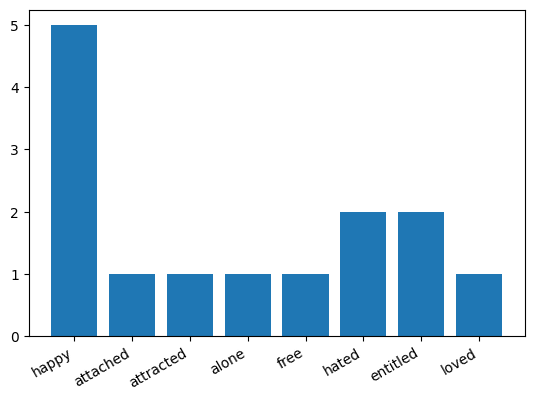

In [8]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.show()